# Comparison of KNN and Classification Trees on Continuous Datasets
In this notebook I'll demonstrate my implementations so far whilst comparing their performance on complete datasets comprised of continuous datasets.
In the cell below, I'll import my implementations thus far

In [2]:
import numpy as np
import sys
sys.path.append("..")
from knn import KNearestNeighbours
from classification_tree import ClassificationTree
from cross_validation import k_folds_accuracy_score, leave_one_out_score
from train_test_split import train_test_split
from preprocessing import MinMaxScaler

Now we'll start with the iris dataset and load this dataset into training and testing. We'll initially try and tune our hyperparameters to find the best values for this dataset - Finding the best k for KNN and the best maximum depth for the tree.

### Loading Iris

In [60]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X, y, seed=4567)
print("Training set size:",X_train_iris.shape)
print("Test set size:",X_test_iris.shape)

Training set size: (113, 4)
Test set size: (37, 4)


## Tuning the Hyperparameters
### Finding optimal K for KNN

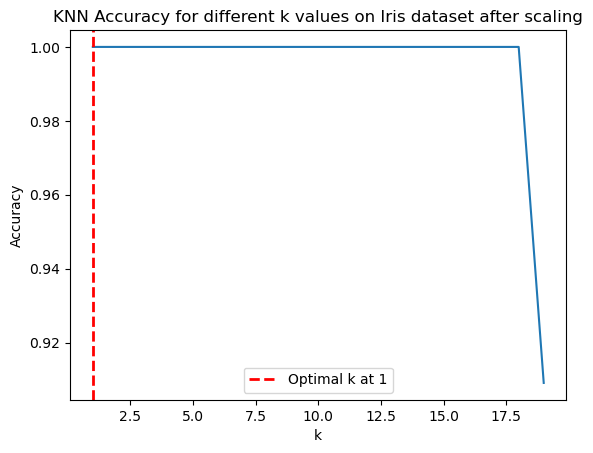

The best value of k is: 1


In [61]:
import matplotlib.pyplot as plt
X_train, X_val, y_train, y_val = train_test_split(X_train_iris, y_train_iris, test_size=0.2, seed=5678)

# Initialize and apply MinMaxScaler
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)

accuracies = []

# Looping from k=1 to k=20
for k in range(1, 20):
    knn = KNearestNeighbours(k)
    knn.fit(scaled_X_train, y_train)
    y_pred_val = knn.predict(scaled_X_val)
    accuracy = np.mean(y_val == y_pred_val)
    accuracies.append(accuracy)

# Plotting the results
plt.plot(range(1, 20), accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different k values on Iris dataset after scaling')

# Finding the best k value
best_k = accuracies.index(max(accuracies)) + 1  # +1 because k starts from 1

# Add a vertical line at the best k value
plt.axvline(x=best_k, color='red', linestyle='--', linewidth=2, label=f'Optimal k at {best_k}')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

print(f"The best value of k is: {best_k}")

### Finding optimal tree depth

1 : actual depth = 1 accuracy: 0.5909090909090909
2 : actual depth = 2 accuracy: 1.0
3 : actual depth = 3 accuracy: 1.0
4 : actual depth = 4 accuracy: 1.0
5 : actual depth = 5 accuracy: 1.0
6 : actual depth = 5 accuracy: 1.0
7 : actual depth = 5 accuracy: 1.0
8 : actual depth = 5 accuracy: 1.0
9 : actual depth = 5 accuracy: 1.0
10 : actual depth = 5 accuracy: 1.0


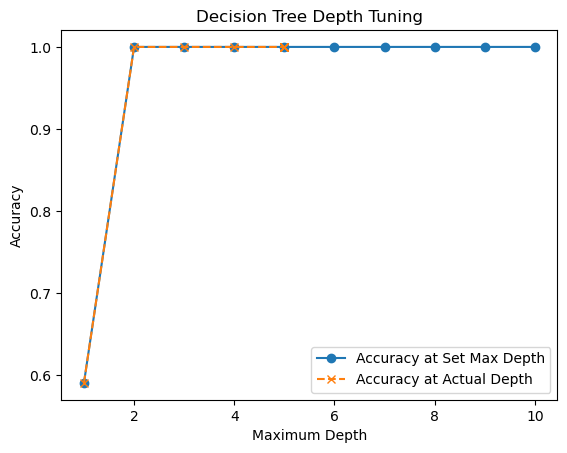

The best depth is: 2


In [62]:

accuracies = []
actual_maximum_depths = []

# Looping from depth=1 to depth=10
for d in range(1, 11):
    tree_tune = ClassificationTree(max_depth=d)
    tree_tune.fit(scaled_X_train, y_train)
    y_pred_val = tree_tune.predict(scaled_X_val)
    accuracy = np.mean(y_val == y_pred_val)
    accuracies.append(accuracy)
    actual_maximum_depths.append(tree_tune.get_depth())

    print(d, ": actual depth =", tree_tune.get_depth(), "accuracy:", accuracy)

# Create a line plot for set maximum depths
plt.plot(range(1, 11), accuracies, label='Accuracy at Set Max Depth', marker='o')

# Create a line plot for actual depths achieved
plt.plot(actual_maximum_depths, accuracies, label='Accuracy at Actual Depth', linestyle='--', marker='x')

# Add labels and title
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Depth Tuning')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Find the best depth
best_depth = accuracies.index(max(accuracies)) + 1  # +1 because depth starts from 1
print(f"The best depth is: {best_depth}")

We'll use k of 10 for KNN moving forwards and we'll set a maximum depth of 5.
We'll now reshuffle the dataset.

## Model Validation
We'll now perform Cross-Validation on these models upon the iris dataset

In [63]:
%%timeit -r 1 -n 1
X, y = iris.data, iris.target
knn = KNearestNeighbours(k=3)
tree = ClassificationTree(max_depth=3)

print("5-Folds - knn -iris - accuracy", k_folds_accuracy_score(knn, X, y, k=5, seed=2345))
print("10-Folds - knn - iris - accuracy", k_folds_accuracy_score(knn, X, y, k=10, seed=2345))
print("Leave-One-Out - knn - iris - accuracy", leave_one_out_score(knn, X, y, seed=2345))
print("")
print("5-Folds - tree -iris - accuracy", k_folds_accuracy_score(tree, X, y, k=5, seed=2345))
print("10-Folds - tree - iris - accuracy", k_folds_accuracy_score(tree, X, y, k=10, seed=2345))
print("Leave-One-Out - tree - iris - accuracy", leave_one_out_score(tree, X, y, seed=2345))


5-Folds - knn -iris - accuracy 0.96
10-Folds - knn - iris - accuracy 0.9666666666666666
Leave-One-Out - knn - iris - accuracy 0.96

5-Folds - tree -iris - accuracy 0.9266666666666667
10-Folds - tree - iris - accuracy 0.9400000000000001
Leave-One-Out - tree - iris - accuracy 0.94
3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Here we see that KNN performs slightly better and overall both models perform quite well. It's worth noting that for now, LOOCV takes quite a while to execute on the tree.

Just for demonstration purposes, I'll print an example of the tree on some fitted data. 

In [64]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X, y, seed=2345)
tree_toprint = ClassificationTree(max_depth=3)
tree_toprint.fit(X_train_iris,y_train_iris)
pred_toprint = tree_toprint.predict(X_test_iris)
acc_toprint = np.mean(pred_toprint == y_test_iris)
print("accuracy = ",acc_toprint)
tree_toprint.print_tree(feature_names = iris.feature_names)


accuracy =  1.0
petal length (cm) <= 3.0
Left:
|   --> Class: 0.0
Right:
|   petal width (cm) <= 1.8
|   Left:
|   |   petal length (cm) <= 5.0
|   |   Left:
|   |   |   --> Class: 1.0
|   |   Right:
|   |   |   --> Class: 2.0
|   Right:
|   |   petal length (cm) <= 4.9
|   |   Left:
|   |   |   --> Class: 2.0
|   |   Right:
|   |   |   --> Class: 2.0


Above, we can see an example of a constructed tree with maximum depth set to 5. This tree has a 97% accuracy rate on predictions in the iris dataset

## Iris Confusion Matrix
We'll take the tree plotted above and place it in a confusion matrix. We'll fit a corresponding KNN model on the same dataset and compare their performance that way.  
We'll import the confusion_matrix display utility from SKLearn

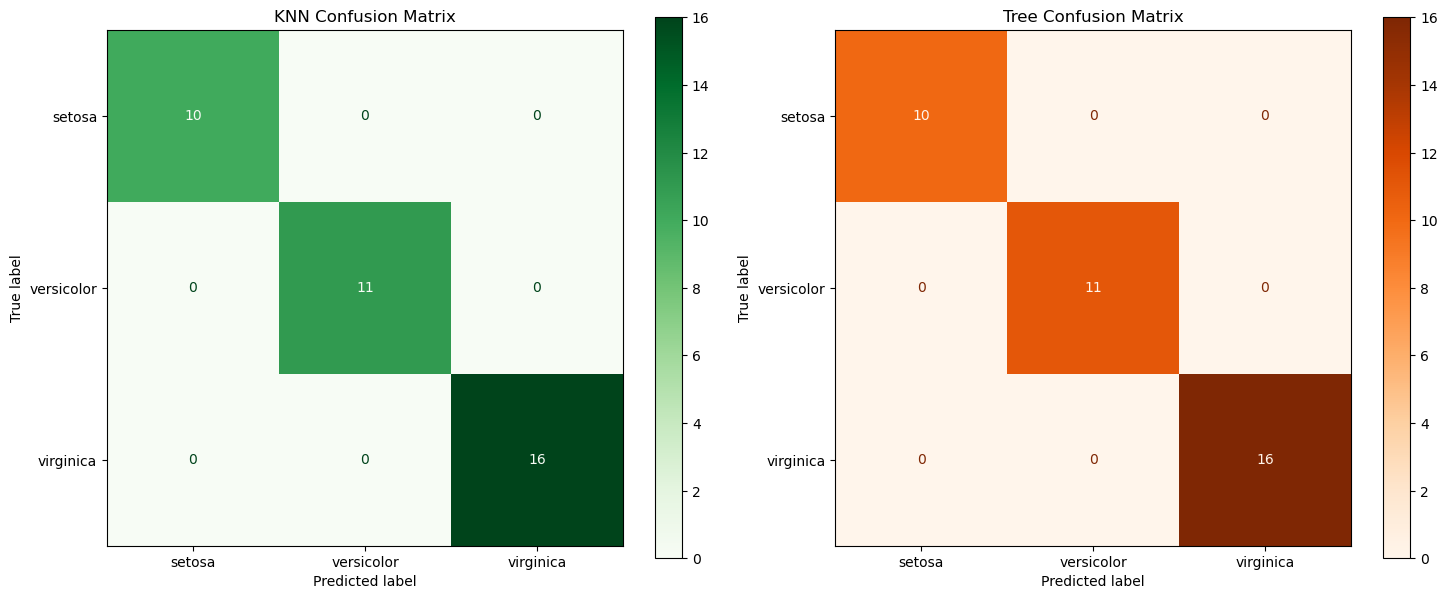

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

tree_cm = confusion_matrix(y_test_iris, pred_toprint)

knn_toprint = KNearestNeighbours(k=10)
knn_toprint.fit(X_train_iris,y_train_iris)
knnpred_toprint = knn_toprint.predict(X_test_iris)

knn_cm = confusion_matrix(y_test_iris, knnpred_toprint)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot KNN confusion matrix
ConfusionMatrixDisplay(knn_cm, display_labels=iris.target_names).plot(cmap='Greens', ax=axes[0])
axes[0].set_title('KNN Confusion Matrix')

# Plot CART tree confusion matrix
ConfusionMatrixDisplay(tree_cm, display_labels=iris.target_names).plot(cmap='Oranges', ax=axes[1])
axes[1].set_title('Tree Confusion Matrix')

plt.tight_layout()
plt.show()


In this instance, we find that KNN predicts everything perfectly, with all samples along the diagonal. Tree has made one false prediction, as was suggested earlier with the 97% accuracy score.
confusion matrices allow us to visualise how well a model performs quite intuitively.

## Loading Ionosphere


In [66]:
iono = np.genfromtxt("../datasets/ionosphere.txt", delimiter=",")
X_io = np.genfromtxt("../datasets/ionosphere.txt", delimiter=",", usecols=np.arange(34))
y_io = np.genfromtxt("../datasets/ionosphere.txt", delimiter=",", usecols=34, dtype="int")
X_train_io, X_test_io, y_train_io, y_test_io = train_test_split(X_io, y_io, seed=2108)
print("Training set size (and features): ", X_train_io.shape)
print("Test set size (and features): ", X_test_io.shape)

Training set size (and features):  (264, 34)
Test set size (and features):  (87, 34)


## Tuning the Hyperparameters
### Finding optimal K for KNN

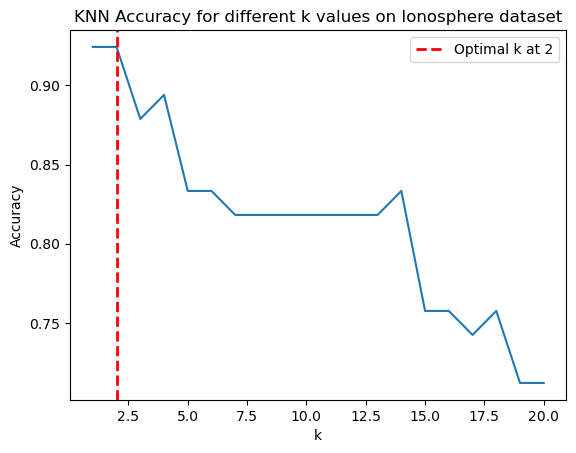

The best value of k for the Ionosphere dataset is: 2


In [67]:
X_train_io, X_test_io, y_train_io, y_test_io = train_test_split(X_io, y_io, seed=2108)
X_train_io, X_val_io, y_train_io, y_val_io = train_test_split(X_train_io, y_train_io, seed=3456)

# Initialize and apply MinMaxScaler
scaler_io = MinMaxScaler()
scaled_X_train_io = scaler_io.fit_transform(X_train_io)
scaled_X_val_io = scaler_io.transform(X_val_io)

accuracies_io = []

# Looping from k=1 to k=20 for the Ionosphere dataset
for k in range(1, 21):
    knn_io = KNearestNeighbours(k)
    knn_io.fit(scaled_X_train_io, y_train_io)
    y_pred_val_io = knn_io.predict(scaled_X_val_io)
    accuracy_io = np.mean(y_val_io == y_pred_val_io)
    accuracies_io.append(accuracy_io)

# Plotting the results
plt.plot(range(1, 21), accuracies_io)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different k values on Ionosphere dataset')

# Finding the best k value
max_accuracy_io = max(accuracies_io)
best_ks = [k for k, accuracy in enumerate(accuracies_io, start=1) if accuracy == max_accuracy_io]
best_k_io = max(best_ks)

# Add a vertical line at the best k value
plt.axvline(x=best_k_io, color='red', linestyle='--', linewidth=2, label=f'Optimal k at {best_k_io}')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

print(f"The best value of k for the Ionosphere dataset is: {best_k_io}")

### Finding optimal tree depth


1 : actual depth = 1 accuracy: 0.803030303030303
2 : actual depth = 2 accuracy: 0.8636363636363636
3 : actual depth = 3 accuracy: 0.8636363636363636
4 : actual depth = 4 accuracy: 0.8787878787878788
5 : actual depth = 5 accuracy: 0.8787878787878788
6 : actual depth = 6 accuracy: 0.8636363636363636
7 : actual depth = 7 accuracy: 0.8636363636363636
8 : actual depth = 8 accuracy: 0.8636363636363636
9 : actual depth = 9 accuracy: 0.8636363636363636
10 : actual depth = 9 accuracy: 0.8636363636363636


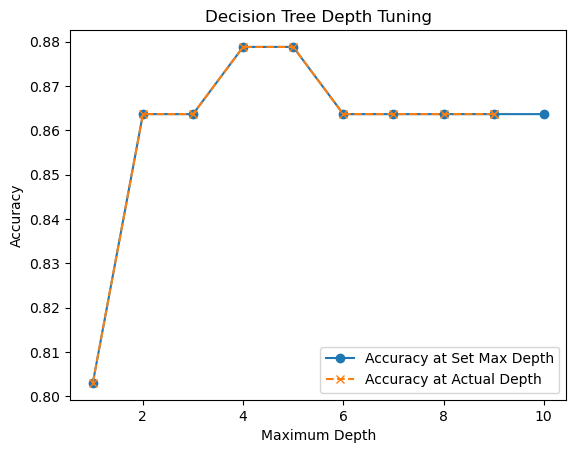

The best depth is: 4


In [68]:

accuracies = []
actual_maximum_depths = []

# Looping from depth=1 to depth=10
for d in range(1, 11):
    tree_tune_io = ClassificationTree(max_depth=d)
    tree_tune_io.fit(scaled_X_train_io, y_train_io)
    y_pred_val_io = tree_tune_io.predict(scaled_X_val_io)
    accuracy_io = np.mean(y_val_io == y_pred_val_io)
    accuracies.append(accuracy_io)
    actual_maximum_depths.append(tree_tune_io.get_depth())

    print(d, ": actual depth =", tree_tune_io.get_depth(), "accuracy:", accuracy_io)

# Create a line plot for set maximum depths
plt.plot(range(1, 11), accuracies, label='Accuracy at Set Max Depth', marker='o')

# Create a line plot for actual depths achieved
plt.plot(actual_maximum_depths, accuracies, label='Accuracy at Actual Depth', linestyle='--', marker='x')

# Add labels and title
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Depth Tuning')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Find the best depth
best_depth = accuracies.index(max(accuracies)) + 1  # +1 because depth starts from 1
print(f"The best depth is: {best_depth}")

In [70]:
%%timeit -r 1 -n 1
X, y = np.genfromtxt("../datasets/ionosphere.txt", delimiter=",", usecols=np.arange(34)), np.genfromtxt("../datasets/ionosphere.txt", delimiter=",", usecols=34, dtype="int")
knn = KNearestNeighbours(k=2)
tree = ClassificationTree(max_depth=4)

print("5-Folds - knn -ionosphere - accuracy", k_folds_accuracy_score(knn, X, y, k=5, seed=2345))
print("10-Folds - knn - ionosphere - accuracy", k_folds_accuracy_score(knn, X, y, k=10, seed=2345))
print("Leave-One-Out - knn - ionosphere - accuracy", leave_one_out_score(knn, X, y, seed=2345))
print("")
print("5-Folds - tree -ionosphere - accuracy", k_folds_accuracy_score(tree, X, y, k=5, seed=2345))
print("10-Folds - tree - ionosphere - accuracy", k_folds_accuracy_score(tree, X, y, k=10, seed=2345))
print("Leave-One-Out - tree - ionosphere - accuracy", leave_one_out_score(tree, X, y, seed=2345))

5-Folds - knn -ionosphere - accuracy 0.8688933601609656
10-Folds - knn - ionosphere - accuracy 0.8660317460317462
Leave-One-Out - knn - ionosphere - accuracy 0.8660968660968661

5-Folds - tree -ionosphere - accuracy 0.8888933601609658
10-Folds - tree - ionosphere - accuracy 0.8690476190476192
Leave-One-Out - tree - ionosphere - accuracy 0.8575498575498576
6min 17s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


 ## Loading Banknote Authentication

In [3]:
# Load the banknote dataset
banknote_data = np.genfromtxt('../datasets/data_banknote_authentication.txt', delimiter=',')

# Split into features and labels
X_bn = banknote_data[:, :-1]  # All rows, all columns except the last
y_bn = banknote_data[:, -1]   # All rows, only the last column

In [4]:
X_train_bn, X_test_bn, y_train_bn, y_test_bn = train_test_split(X_bn, y_bn, seed=2108)
print("Training set size (and features): ", X_train_bn.shape)
print("Test set size (and features): ", X_test_bn.shape)

Training set size (and features):  (1029, 4)
Test set size (and features):  (343, 4)


## Tuning the Hyperparameters
### Finding optimal K for KNN

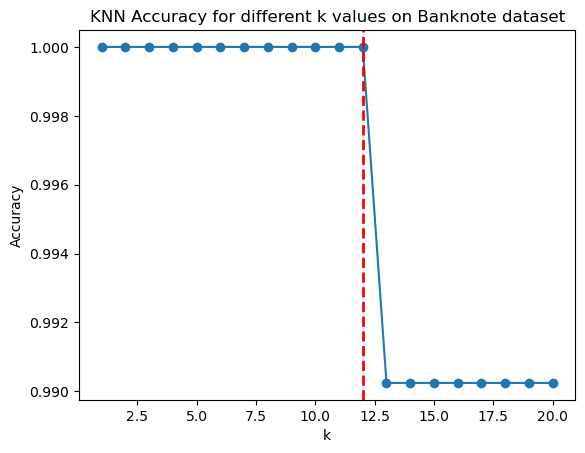

The best value of k for the Banknote Authentication dataset is: 12
9.58 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [14]:
%%timeit -r 1 -n 1
import matplotlib.pyplot as plt

X_train_bn, X_test_bn, y_train_bn, y_test_bn = train_test_split(X_bn, y_bn, seed=2108)

# Split the training data into training and validation sets
X_train_bn, X_val_bn, y_train_bn, y_val_bn = train_test_split(X_train_bn, y_train_bn, test_size=0.2, seed=2108)

# Initialize the MinMaxScaler
scaler_bn = MinMaxScaler()

# Fit the scaler on the training data and transform both the training and validation data
scaled_X_train_bn = scaler_bn.fit_transform(X_train_bn)
scaled_X_val_bn = scaler_bn.transform(X_val_bn)

# List to store the accuracies for different values of k
accuracies_bn = []

# Loop over various values of k
for k in range(1, 21):
    knn_bn = KNearestNeighbours(k)
    knn_bn.fit(scaled_X_train_bn, y_train_bn)
    y_pred_val_bn = knn_bn.predict(scaled_X_val_bn)
    accuracy_bn = np.mean(y_pred_val_bn == y_val_bn)
    accuracies_bn.append(accuracy_bn)

# Plotting the accuracy for different values of k
plt.plot(range(1, 21), accuracies_bn, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different k values on Banknote dataset')

# Highlight the best k value
max_accuracy_bn = max(accuracies_bn)
best_ks = [k for k, accuracy in enumerate(accuracies_bn, start=1) if accuracy == max_accuracy_bn]
best_k_bn = max(best_ks)

plt.axvline(x=best_k_bn, color='red', linestyle='--', linewidth=2, label=f'Optimal k at {best_k_bn}')


# Show the plot
plt.show()

print(f"The best value of k for the Banknote Authentication dataset is: {best_k_bn}")


### Finding optimal tree depth


1 : actual depth = 1 accuracy: 0.8439024390243902
2 : actual depth = 2 accuracy: 0.9024390243902439
3 : actual depth = 3 accuracy: 0.926829268292683
4 : actual depth = 4 accuracy: 0.9658536585365853
5 : actual depth = 5 accuracy: 0.9804878048780488
6 : actual depth = 6 accuracy: 0.9804878048780488
7 : actual depth = 7 accuracy: 0.9804878048780488
8 : actual depth = 7 accuracy: 0.9804878048780488
9 : actual depth = 7 accuracy: 0.9804878048780488
10 : actual depth = 7 accuracy: 0.9804878048780488


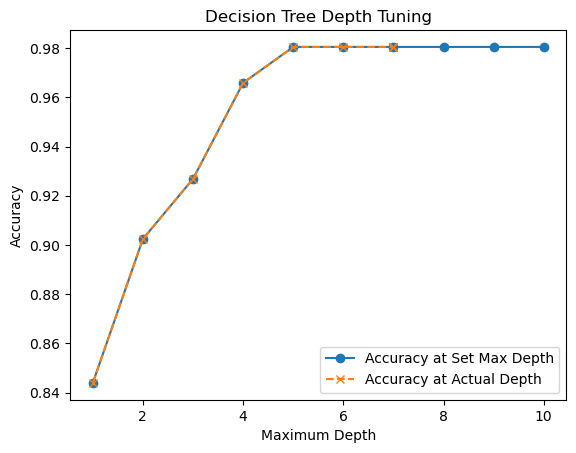

The best depth is: 5


In [15]:

accuracies = []
actual_maximum_depths = []

# Looping from depth=1 to depth=10
for d in range(1, 11):
    tree_tune_bn = ClassificationTree(max_depth=d)
    tree_tune_bn.fit(scaled_X_train_bn, y_train_bn)
    y_pred_val_bn = tree_tune_bn.predict(scaled_X_val_bn)
    accuracy_bn = np.mean(y_val_bn == y_pred_val_bn)
    accuracies.append(accuracy_bn)
    actual_maximum_depths.append(tree_tune_bn.get_depth())

    print(d, ": actual depth =", tree_tune_bn.get_depth(), "accuracy:", accuracy_bn)

# Create a line plot for set maximum depths
plt.plot(range(1, 11), accuracies, label='Accuracy at Set Max Depth', marker='o')

# Create a line plot for actual depths achieved
plt.plot(actual_maximum_depths, accuracies, label='Accuracy at Actual Depth', linestyle='--', marker='x')

# Add labels and title
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Depth Tuning')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Find the best depth
best_depth = accuracies.index(max(accuracies)) + 1  # +1 because depth starts from 1
print(f"The best depth is: {best_depth}")

In [ ]:
%%timeit -r 1 -n 1
banknote_data = np.genfromtxt('../datasets/data_banknote_authentication.txt', delimiter=',')
X, y = banknote_data[:, :-1], banknote_data[:, -1]   # All rows, only the last column
knn = KNearestNeighbours(k=12)
tree = ClassificationTree(max_depth=7)

print("5-Folds - knn -banknote - accuracy", k_folds_accuracy_score(knn, X, y, k=5, seed=3456))
print("10-Folds - knn - banknote - accuracy", k_folds_accuracy_score(knn, X, y, k=10, seed=3456))
print("Leave-One-Out - knn - banknote - accuracy", leave_one_out_score(knn, X, y, seed=3456))
print("")
print("5-Folds - tree - banknote - accuracy", k_folds_accuracy_score(tree, X, y, k=5, seed=3456))
print("10-Folds - tree - banknote - accuracy", k_folds_accuracy_score(tree, X, y, k=10, seed=3456))
print("Leave-One-Out - tree - banknote - accuracy", leave_one_out_score(tree, X, y, seed=3456))

5-Folds - knn -banknote - accuracy 1.0
10-Folds - knn - banknote - accuracy 1.0
Leave-One-Out - knn - banknote - accuracy 1.0

5-Folds - tree - banknote - accuracy 0.9810589230931978
10-Folds - tree - banknote - accuracy 0.9759859265871974
